# Skills_Trend

In [2]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt  
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Create a list of SEA countries
SEA_countries = ['Vietnam', 'Thailand','Malaysia','Philippines','Indonesia','Laos','Cambodia','Myanmar','Singapore']

c:\Users\Pham Duc Toan\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## How are in-demand skills trending for Data Analysts in SEA countries?

### Methodology

- Aggregate skill counts on a monthly basis
- Re-analyze based on percentage of total jobs
- Plot the monthly skill demand

1. Aggregate skill counts on a monthly basis

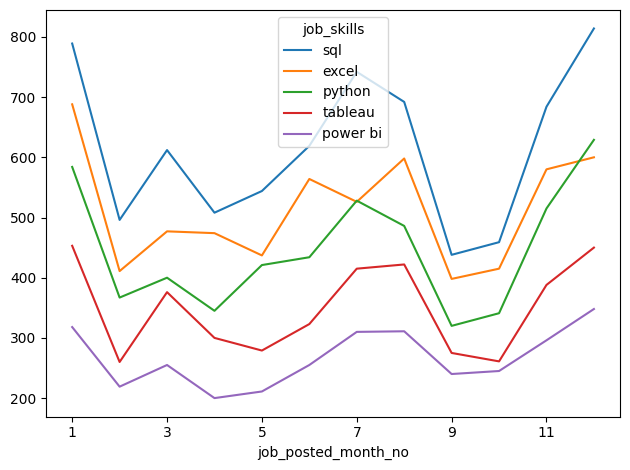

In [26]:
df_DA_SEA = df[
    (df['job_country'].isin(SEA_countries)) &
    (df['job_title_short'] == 'Data Analyst')
    ].copy()

df_DA_SEA['job_posted_month_no'] = df_DA_SEA['job_posted_date'].dt.month

df_DA_SEA_explode = df_DA_SEA.explode('job_skills')

df_pivot = df_DA_SEA_explode.pivot_table(index='job_posted_month_no', columns='job_skills',aggfunc='size', fill_value=0)

df_pivot.loc['Total'] = df_pivot.sum()
# sort the values of the row "Total" and use the index to change the order of columns in the df
sorted_skills = df_pivot.loc['Total'].sort_values(ascending=False).index

df_pivot = df_pivot[sorted_skills]

df_pivot = df_pivot.drop('Total')

df_pivot.iloc[:,:5].plot(
    kind="line"
)

plt.tight_layout()

2. Re-analyze based on percentage of total jobs

In [14]:
# get the total number of job posting each month
monthly_total_jobs = df_DA_SEA.groupby('job_posted_month_no').size()
monthly_total_jobs

job_posted_month_no
1     1891
2     1074
3     1258
4     1166
5     1126
6     1323
7     1438
8     1431
9     1061
10    1113
11    1620
12    1739
dtype: int64

In [27]:
# divide every rows of the 'df_pivot' df by the total number of jobs at the 'month_total_jobs' df
df_pivot_perc = df_pivot.div(monthly_total_jobs/100,axis=0)

In [40]:
# change month num to month name

df_pivot_perc = df_pivot_perc.reset_index()
df_pivot_perc['job_posted_month'] = df_pivot_perc['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m')).dt.strftime('%b')
df_pivot_perc = df_pivot_perc.set_index('job_posted_month')
df_pivot_perc = df_pivot_perc.drop(columns=['job_posted_month_no','level_0','index'])
df_pivot_perc

job_skills,sql,excel,python,tableau,power bi
job_posted_month,,,,,
Jan,41.723956,36.382866,30.883131,23.955579,16.816499
Feb,46.182495,38.268156,34.171322,24.208566,20.391061
Mar,48.648649,37.917329,31.796502,29.888712,20.270270
Apr,43.567753,40.651801,29.588336,25.728988,17.152659
May,48.312611,38.809947,37.388988,24.777975,18.738899
Jun,46.787604,42.630385,32.804233,24.414210,19.274376
Jul,51.599444,36.578581,36.717663,28.859527,21.557719
Aug,48.357792,41.788959,33.962264,29.489867,21.733054
Sep,41.281810,37.511781,30.160226,25.918944,22.620170


3. Plot the monthly skill demand

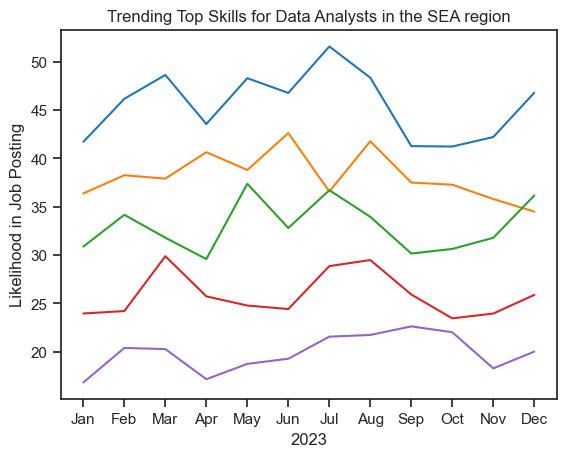

In [47]:
df_plot = df_pivot_perc.iloc[:,:5]

sns.lineplot(
    data= df_plot,
    dashes= False,
    palette= 'tab10'
)
sns.set_theme(style = 'ticks')

plt.title('Trending Top Skills for Data Analysts in the SEA region')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()

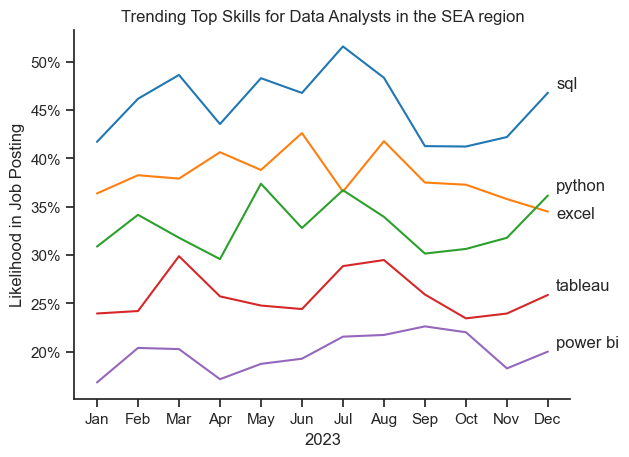

In [68]:

df_plot = df_pivot_perc.iloc[:,:5]


sns.lineplot(
    data= df_plot,
    dashes= False,
    palette= 'tab10'
)
sns.set_theme(style = 'ticks')
sns.despine()

plt.title('Trending Top Skills for Data Analysts in the SEA region')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()

from matplotlib.ticker import PercentFormatter # this function add percent sign (%) on the tickers
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))


for i in range(5):
    if df_plot.columns[i] != 'excel' :
        plt.text(x= 11.2, y= df_plot.iloc[-1,i]+0.5, s= df_plot.columns[i])
    else: 
        plt.text(x= 11.2, y= df_plot.iloc[-1,i]-0.7, s= df_plot.columns[i])
# df.columns returns the name of the column
     

